# Text analysis on Stocks of Healthcare in US based on data collected from Twitter

By Chenxin Xie

## Project defination

* Using Twitter API to collect the tweets about 3 stocks in 2 weeks of December:
     Healthcare in US:
        JNJ: Johnson & Johnson Common Stock
        MRK: Merck & Company, Inc. Common Stock (new)
        MDT: Medtronic plc. Ordinary Shares

* Do some basic text analysis:
      most common words per stock, 
      word cloud per stock, 
      simple sentiment detection (positive/negative), etc.
    
* Visualize the stock price together with its text sentiment.

## Install packages and import packages

In [2]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
import sys
import os
import re
import tweepy
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn import metrics
import pandas as pd
import numpy as np
import string
import time
import datetime
from pprint import pprint
from datetime import datetime, date, time
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image 
from scipy.misc import imread
from imageio import imread
from textblob import TextBlob 

##  Collect data from Twitter through API

* Refernce: https://www.tweepy.org/

In [19]:
#set API key
consumer_key = "LOS7GYGwwgOfZrRfBnBIhdDVA"
consumer_secret = "5YJ9M7QYs167N5wiBWQziDw2lldouslMr0iBr0G50PxsEf4BTA"
access_token = "1200343741686517760-nw0gmcmmj0BSO3oGZvlbEvsImhVBm1"
access_token_secret = "1clsDN4hcUczZJU8mLGpwUwPmZp37JIPOXwJrIAojFLMK"

In [20]:
#Seting for API Calling
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

### Stock 1: JNJ

In [51]:
#JNJ Twitter account information
api.get_user("Johnson_bio")

User(_api=<tweepy.api.API object at 0x000001B03BF95A08>, _json={'id': 267855564, 'id_str': '267855564', 'name': 'Johnson & Johnson', 'screen_name': 'Johnson_bio', 'location': 'London', 'profile_location': None, 'description': "BioPortfolio's Johnson & Johnson channel is a global digest of the latest news, research, reports and clinical trials by J&J", 'url': 'https://t.co/dX5FNXYJiX', 'entities': {'url': {'urls': [{'url': 'https://t.co/dX5FNXYJiX', 'expanded_url': 'http://www.bioportfolio.com/johnson-and-johnson', 'display_url': 'bioportfolio.com/johnson-and-jo…', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 170, 'friends_count': 29, 'listed_count': 5, 'created_at': 'Thu Mar 17 17:32:25 +0000 2011', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 11685, 'lang': None, 'status': {'created_at': 'Sun Dec 15 16:11:02 +0000 2019', 'id': 1206245287569715201, 'id_str': '12062

In [52]:
#JNJNews Twitter account information
api.get_user("JNJNews")

User(_api=<tweepy.api.API object at 0x000001B03BF95A08>, _json={'id': 20457806, 'id_str': '20457806', 'name': 'Johnson & Johnson', 'screen_name': 'JNJNews', 'location': '', 'profile_location': None, 'description': 'Updates and information for the media from our Corporate Communication team', 'url': 'https://t.co/4xkBW6xaPT', 'entities': {'url': {'urls': [{'url': 'https://t.co/4xkBW6xaPT', 'expanded_url': 'https://www.jnj.com/', 'display_url': 'jnj.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 183555, 'friends_count': 2530, 'listed_count': 2469, 'created_at': 'Mon Feb 09 19:12:13 +0000 2009', 'favourites_count': 2860, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 13614, 'lang': None, 'status': {'created_at': 'Sun Dec 15 15:00:11 +0000 2019', 'id': 1206227460452282368, 'id_str': '1206227460452282368', 'text': "#DYK Fred Kilmer—#JNJ's first scientific director—established our Aseptic Depa

In [21]:
#extract tweets posted by twitter account: @Johnson_bio
public_tweets = api.user_timeline("Johnson_bio")
Johnson_bio=[]
for tweet in public_tweets:
    Johnson_bio.append(tweet.text)
    
pd.DataFrame(Johnson_bio).to_csv(r'C:/Users/cxie/Desktop/Johnson_bio_2019.12.16.csv')

In [22]:
#extract tweets posted by twitter account: @JNJNews
public_tweets = api.user_timeline("JNJNews")
JNJNews=[]
for tweet in public_tweets:
    JNJNews.append(tweet.text)
    
pd.DataFrame(JNJNews).to_csv(r'C:/Users/cxie/Desktop/JNJNews_2019.12.16.csv')

In [6]:
#Read in all the files extract from Dec 02 to Dec 16
JNJNews_1202 = pd.read_csv('./temp_result/JNJ/JNJNews_2019.12.02.csv', header=None)
JNJNews_1203 = pd.read_csv('./temp_result/JNJ/JNJNews_2019.12.03.csv', header=None)
JNJNews_1207 = pd.read_csv('./temp_result/JNJ/JNJNews_2019.12.07.csv', header=None)
JNJNews_1210 = pd.read_csv('./temp_result/JNJ/JNJNews_2019.12.10.csv', header=None)
JNJNews_1211 = pd.read_csv('./temp_result/JNJ/JNJNews_2019.12.11.csv', header=None)
JNJNews_1212 = pd.read_csv('./temp_result/JNJ/JNJNews_2019.12.12.csv', header=None)
JNJNews_1213 = pd.read_csv('./temp_result/JNJ/JNJNews_2019.12.13.csv', header=None)
JNJNews_1215 = pd.read_csv('./temp_result/JNJ/JNJNews_2019.12.15.csv', header=None)
JNJNews_1216 = pd.read_csv('./temp_result/JNJ/JNJNews_2019.12.16.csv', header=None)

Johnson_bio_1202 = pd.read_csv('./temp_result/JNJ/Johnson_bio_2019.12.02.csv', header=None)
Johnson_bio_1203 = pd.read_csv('./temp_result/JNJ/Johnson_bio_2019.12.03.csv', header=None)
Johnson_bio_1207 = pd.read_csv('./temp_result/JNJ/Johnson_bio_2019.12.07.csv', header=None)
Johnson_bio_1210 = pd.read_csv('./temp_result/JNJ/Johnson_bio_2019.12.10.csv', header=None)
Johnson_bio_1211 = pd.read_csv('./temp_result/JNJ/Johnson_bio_2019.12.11.csv', header=None)
Johnson_bio_1212 = pd.read_csv('./temp_result/JNJ/Johnson_bio_2019.12.12.csv', header=None)
Johnson_bio_1213 = pd.read_csv('./temp_result/JNJ/Johnson_bio_2019.12.13.csv', header=None)
Johnson_bio_1215 = pd.read_csv('./temp_result/JNJ/Johnson_bio_2019.12.15.csv', header=None)
Johnson_bio_1216 = pd.read_csv('./temp_result/JNJ/Johnson_bio_2019.12.16.csv', header=None)

In [7]:
#Stack all the files into one file
JNJ =  pd.concat([JNJNews_1202, JNJNews_1203, JNJNews_1207, JNJNews_1210, 
                  JNJNews_1211, JNJNews_1212, JNJNews_1213, JNJNews_1215, JNJNews_1216,
                  Johnson_bio_1202, Johnson_bio_1203, Johnson_bio_1207, Johnson_bio_1210,
                  Johnson_bio_1211, Johnson_bio_1212, Johnson_bio_1213, Johnson_bio_1215, Johnson_bio_1216
                 ],ignore_index=True)

In [8]:
#Subset only the tweets
JNJ = JNJ[[1]]
JNJ.shape

(378, 1)

In [9]:
#Remove duplicate tweets
JNJ.drop_duplicates(subset=None, inplace=True)

In [10]:
JNJ.shape

(96, 1)

In [10]:
#Remove the first row
JNJ = JNJ.iloc[1:]

In [12]:
JNJ

,1
1,"On #WorldAIDSDay, #JNJ is proud to share the p..."
2,"""I did what many wouldn't—I removed my gloves ..."
3,"""The way to deal with the shame and trauma, in..."
4,"Meet Dr. @SchuitemakerH, the trailblazing HIV ..."
5,"#DYK before BAND-AID® Brand adhesive bandages,..."
...,...
337,TAIWAN CONTACT LENSES MARKET 20192025 Publishe...
338,CANADA CONTACT LENSES MARKET 20192025 Publishe...
339,Global Enzyme Replacement Therapy Market Resea...
340,SOUTH KOREA CONTACT LENSES MARKET 20192025 Pub...


In [11]:
#Remove URL from the tweets
JNJ[1] = JNJ[1].str.replace('http\S+|www.\S+', '', case=False)

In [12]:
pd.DataFrame(JNJ).to_csv(r'C:/Users/cxie/Desktop/JNJ_cleaned.csv')

### Stock 2: MRK

In [59]:
#Merck Twitter account information
api.get_user("Merck")

User(_api=<tweepy.api.API object at 0x000001B03BF95A08>, _json={'id': 35961145, 'id_str': '35961145', 'name': 'Merck', 'screen_name': 'Merck', 'location': 'Kenilworth, NJ', 'profile_location': None, 'description': 'We have always been and always will be inventing for the single greatest purpose: Life. Intended for U.S. residents only. FLS: https://t.co/unmH53cudx', 'url': 'https://t.co/7E9xWA9zUg', 'entities': {'url': {'urls': [{'url': 'https://t.co/7E9xWA9zUg', 'expanded_url': 'http://www.merck.com/privacy', 'display_url': 'merck.com/privacy', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/unmH53cudx', 'expanded_url': 'http://bit.ly/1Oc7M6l', 'display_url': 'bit.ly/1Oc7M6l', 'indices': [127, 150]}]}}, 'protected': False, 'followers_count': 175172, 'friends_count': 1009, 'listed_count': 1937, 'created_at': 'Tue Apr 28 02:40:05 +0000 2009', 'favourites_count': 1688, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 788

In [60]:
#MerckHealthcare Twitter account information
api.get_user("MerckHealthcare")

User(_api=<tweepy.api.API object at 0x000001B03BF95A08>, _json={'id': 857893749959086080, 'id_str': '857893749959086080', 'name': 'Merck Healthcare', 'screen_name': 'MerckHealthcare', 'location': 'Darmstadt, Germany', 'profile_location': None, 'description': 'Global specialty innovator helping to create, improve and prolong life. Not intended for US&CA visitors. Imprint: https://t.co/JpQAm9zaNW', 'url': 'https://t.co/kzYG7Ht07Q', 'entities': {'url': {'urls': [{'url': 'https://t.co/kzYG7Ht07Q', 'expanded_url': 'http://www.merckgroup.com', 'display_url': 'merckgroup.com', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/JpQAm9zaNW', 'expanded_url': 'http://merckgroup.com/imprint', 'display_url': 'merckgroup.com/imprint', 'indices': [114, 137]}]}}, 'protected': False, 'followers_count': 3949, 'friends_count': 449, 'listed_count': 41, 'created_at': 'Fri Apr 28 09:46:23 +0000 2017', 'favourites_count': 365, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'v

In [61]:
#merckgroup Twitter account information
api.get_user("merckgroup")

User(_api=<tweepy.api.API object at 0x000001B03BF95A08>, _json={'id': 179015119, 'id_str': '179015119', 'name': 'Merck', 'screen_name': 'merckgroup', 'location': 'Darmstadt, Germany', 'profile_location': None, 'description': 'A leading science and technology company in healthcare, life science, performance materials. Not intended for US&CA visitors. https://t.co/wh24XCVhmE', 'url': 'https://t.co/kzYG7Ht07Q', 'entities': {'url': {'urls': [{'url': 'https://t.co/kzYG7Ht07Q', 'expanded_url': 'http://www.merckgroup.com', 'display_url': 'merckgroup.com', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/wh24XCVhmE', 'expanded_url': 'https://www.merckgroup.com/imprint', 'display_url': 'merckgroup.com/imprint', 'indices': [126, 149]}]}}, 'protected': False, 'followers_count': 16174, 'friends_count': 357, 'listed_count': 314, 'created_at': 'Mon Aug 16 08:13:48 +0000 2010', 'favourites_count': 4917, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True,

In [30]:
#extract tweets posted by twitter account: @Merc
public_tweets= api.user_timeline("Merck")
Merck=[]
for tweet in public_tweets:
    Merck.append(tweet.text)
    
pd.DataFrame(Merck).to_csv(r'C:/Users/cxie/Desktop/Merck_2019.12.16.csv')

In [31]:
#extract tweets posted by twitter account: @merckgroup
public_tweets = api.user_timeline("merckgroup")
merckgroup=[]
for tweet in public_tweets:
    merckgroup.append(tweet.text)
    
pd.DataFrame(merckgroup).to_csv(r'C:/Users/cxie/Desktop/merckgroup_2019.12.16.csv')

In [32]:
#extract tweets posted by twitter account: @MerckHealthcare
public_tweets= api.user_timeline("MerckHealthcare")
MerckHealthcare=[]
for tweet in public_tweets:
    MerckHealthcare.append(tweet.text)
    
pd.DataFrame(MerckHealthcare).to_csv(r'C:/Users/cxie/Desktop/MerckHealthcare_2019.12.16.csv')

In [13]:
#Read in all the files extract from Dec 02 to Dec 16
MRK_1202 = pd.read_csv('./temp_result/MRK/Merck_2019.12.02.csv', header=None)
MRK_1203 = pd.read_csv('./temp_result/MRK/Merck_2019.12.03.csv', header=None)
MRK_1207 = pd.read_csv('./temp_result/MRK/Merck_2019.12.07.csv', header=None)
MRK_1210 = pd.read_csv('./temp_result/MRK/Merck_2019.12.10.csv', header=None)
MRK_1211 = pd.read_csv('./temp_result/MRK/Merck_2019.12.11.csv', header=None)
MRK_1212 = pd.read_csv('./temp_result/MRK/Merck_2019.12.12.csv', header=None)
MRK_1213 = pd.read_csv('./temp_result/MRK/Merck_2019.12.13.csv', header=None)
MRK_1215 = pd.read_csv('./temp_result/MRK/Merck_2019.12.15.csv', header=None)
MRK_1216 = pd.read_csv('./temp_result/MRK/Merck_2019.12.16.csv', header=None)

MRKG_1202 = pd.read_csv('./temp_result/MRK/merckgroup_2019.12.02.csv', header=None)
MRKG_1203 = pd.read_csv('./temp_result/MRK/merckgroup_2019.12.03.csv', header=None)
MRKG_1207 = pd.read_csv('./temp_result/MRK/merckgroup_2019.12.07.csv', header=None)
MRKG_1210 = pd.read_csv('./temp_result/MRK/merckgroup_2019.12.10.csv', header=None)
MRKG_1211 = pd.read_csv('./temp_result/MRK/merckgroup_2019.12.11.csv', header=None)
MRKG_1212 = pd.read_csv('./temp_result/MRK/merckgroup_2019.12.12.csv', header=None)
MRKG_1213 = pd.read_csv('./temp_result/MRK/merckgroup_2019.12.13.csv', header=None)
MRKG_1215 = pd.read_csv('./temp_result/MRK/merckgroup_2019.12.15.csv', header=None)
MRKG_1216 = pd.read_csv('./temp_result/MRK/merckgroup_2019.12.16.csv', header=None)

MRKHC_1202 = pd.read_csv('./temp_result/MRK/MerckHealthcare_2019.12.02.csv', header=None)
MRKHC_1203 = pd.read_csv('./temp_result/MRK/MerckHealthcare_2019.12.03.csv', header=None)
MRKHC_1207 = pd.read_csv('./temp_result/MRK/MerckHealthcare_2019.12.07.csv', header=None)
MRKHC_1210 = pd.read_csv('./temp_result/MRK/MerckHealthcare_2019.12.10.csv', header=None)
MRKHC_1211 = pd.read_csv('./temp_result/MRK/MerckHealthcare_2019.12.11.csv', header=None)
MRKHC_1212 = pd.read_csv('./temp_result/MRK/MerckHealthcare_2019.12.12.csv', header=None)
MRKHC_1213 = pd.read_csv('./temp_result/MRK/MerckHealthcare_2019.12.13.csv', header=None)
MRKHC_1215 = pd.read_csv('./temp_result/MRK/MerckHealthcare_2019.12.15.csv', header=None)
MRKHC_1216 = pd.read_csv('./temp_result/MRK/MerckHealthcare_2019.12.16.csv', header=None)

In [14]:
#Stack all the files into one file
MRK =  pd.concat([MRK_1202, MRK_1203, MRK_1207, MRK_1210, MRK_1211, MRK_1212, MRK_1213, MRK_1215, MRK_1216,
                  MRKG_1202, MRKG_1203, MRKG_1207, MRKG_1210, MRKG_1211, MRKG_1212, MRKG_1213, MRKG_1215, MRKG_1216, 
                  MRKHC_1202, MRKHC_1203, MRKHC_1207, MRKHC_1210, MRKHC_1211, MRKHC_1212, MRKHC_1213, MRKHC_1215, MRKHC_1216
                 ],ignore_index=True)

In [15]:
#Subset only the tweets
MRK = MRK[[1]]
MRK.shape

(567, 1)

In [16]:
#Remove duplicate tweets
MRK.drop_duplicates(subset=None, inplace=True)

In [28]:
MRK.shape

(109, 1)

In [19]:
MRK

,1
0,0
1,.@mike_nally to present at the Evercore ISI He...
2,Learn more about our latest #BladderCancer upd...
3,"Decades after the start of the epidemic, HIV a..."
4,We're committed to working with public and pri...
...,...
444,We hope you enjoyed #IDF2019! Diabetes is a se...
463,Did you catch our Head of General Medicine and...
505,Exciting news! The 2020 Grant for Multiple Scl...
506,Apply now for the 2020 #GrantForGrowthInnovati...


In [17]:
#Remove the first row
MRK = MRK.iloc[1:]

In [18]:
#Remove URL from the tweets
MRK[1] = MRK[1].str.replace('http\S+|www.\S+', '', case=False)

In [19]:
pd.DataFrame(MRK).to_csv(r'C:/Users/cxie/Desktop/MRK_cleaned.csv')

### Stock 3: MDT

In [70]:
#Medtronic Twitter account information
api.get_user("Medtronic")

User(_api=<tweepy.api.API object at 0x000001B03BF95A08>, _json={'id': 52846066, 'id_str': '52846066', 'name': 'Medtronic', 'screen_name': 'Medtronic', 'location': 'Minneapolis', 'profile_location': None, 'description': 'A global healthcare solutions company — committed to improving lives through our medical technologies, services, and solutions.  https://t.co/iIsZotRH8F', 'url': 'https://t.co/SPqi0x6w0x', 'entities': {'url': {'urls': [{'url': 'https://t.co/SPqi0x6w0x', 'expanded_url': 'http://www.medtronic.com', 'display_url': 'medtronic.com', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/iIsZotRH8F', 'expanded_url': 'http://bit.ly/2ApMbnK', 'display_url': 'bit.ly/2ApMbnK', 'indices': [129, 152]}]}}, 'protected': False, 'followers_count': 58666, 'friends_count': 392, 'listed_count': 957, 'created_at': 'Wed Jul 01 20:48:12 +0000 2009', 'favourites_count': 229, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 3853, 

In [71]:
#MDT_Cardiac Twitter account information
api.get_user("MDT_Cardiac")

User(_api=<tweepy.api.API object at 0x000001B03BF95A08>, _json={'id': 868591417, 'id_str': '868591417', 'name': 'Medtronic Cardiac', 'screen_name': 'MDT_Cardiac', 'location': '', 'profile_location': None, 'description': 'Medtronic welcomes physicians and clinicians living in the US to learn more about our cardiac devices and therapies. For important safety info visit:', 'url': 'https://t.co/eyFwM4xSzp', 'entities': {'url': {'urls': [{'url': 'https://t.co/eyFwM4xSzp', 'expanded_url': 'http://manuals.medtronic.com/', 'display_url': 'manuals.medtronic.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 7774, 'friends_count': 93, 'listed_count': 0, 'created_at': 'Mon Oct 08 19:55:21 +0000 2012', 'favourites_count': 61, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 3291, 'lang': None, 'status': {'created_at': 'Thu Dec 12 15:00:06 +0000 2019', 'id': 1205140272990035968, 'id_str': '12051402729900

In [40]:
#extract tweets posted by twitter account: @Medtronic
public_tweets= api.user_timeline("Medtronic")
Medtronic=[]
for tweet in public_tweets:
    Medtronic.append(tweet.text)
    
pd.DataFrame(Medtronic).to_csv(r'C:/Users/cxie/Desktop/Medtronic_2019.12.16.csv')

In [41]:
#extract tweets posted by twitter account: @MDT_Cardiac
public_tweets= api.user_timeline("MDT_Cardiac")
MDT_Cardiac=[]
for tweet in public_tweets:
    MDT_Cardiac.append(tweet.text)
    
pd.DataFrame(MDT_Cardiac).to_csv(r'C:/Users/cxie/Desktop/MDT_Cardiac_2019.12.16.csv')

In [20]:
#Read in all the files extract from Dec 02 to Dec 16
MDTC_1202 = pd.read_csv('./temp_result/MDT/MDT_Cardiac_2019.12.02.csv', header=None)
MDTC_1203 = pd.read_csv('./temp_result/MDT/MDT_Cardiac_2019.12.03.csv', header=None)
MDTC_1207 = pd.read_csv('./temp_result/MDT/MDT_Cardiac_2019.12.07.csv', header=None)
MDTC_1210 = pd.read_csv('./temp_result/MDT/MDT_Cardiac_2019.12.10.csv', header=None)
MDTC_1211 = pd.read_csv('./temp_result/MDT/MDT_Cardiac_2019.12.11.csv', header=None)
MDTC_1212 = pd.read_csv('./temp_result/MDT/MDT_Cardiac_2019.12.12.csv', header=None)
MDTC_1213 = pd.read_csv('./temp_result/MDT/MDT_Cardiac_2019.12.13.csv', header=None)
MDTC_1215 = pd.read_csv('./temp_result/MDT/MDT_Cardiac_2019.12.15.csv', header=None)
MDTC_1216 = pd.read_csv('./temp_result/MDT/MDT_Cardiac_2019.12.16.csv', header=None)

MDT_1202 = pd.read_csv('./temp_result/MDT/Medtronic_2019.12.02.csv', header=None)
MDT_1203 = pd.read_csv('./temp_result/MDT/Medtronic_2019.12.03.csv', header=None)
MDT_1207 = pd.read_csv('./temp_result/MDT/Medtronic_2019.12.07.csv', header=None)
MDT_1210 = pd.read_csv('./temp_result/MDT/Medtronic_2019.12.10.csv', header=None)
MDT_1211 = pd.read_csv('./temp_result/MDT/Medtronic_2019.12.11.csv', header=None)
MDT_1212 = pd.read_csv('./temp_result/MDT/Medtronic_2019.12.12.csv', header=None)
MDT_1213 = pd.read_csv('./temp_result/MDT/Medtronic_2019.12.13.csv', header=None)
MDT_1215 = pd.read_csv('./temp_result/MDT/Medtronic_2019.12.15.csv', header=None)
MDT_1216 = pd.read_csv('./temp_result/MDT/Medtronic_2019.12.16.csv', header=None)

In [21]:
#Stack all the files into one file
MDT =  pd.concat([MDTC_1202, MDTC_1203, MDTC_1207, MDTC_1210, MDTC_1211, MDTC_1212, MDTC_1213, MDTC_1215, MDTC_1216, 
                 MDT_1202, MDT_1203, MDT_1207, MDT_1210, MDT_1211, MDT_1212, MDT_1213, MDT_1215, MDT_1216
                 ],ignore_index=True)

In [22]:
#Subset only the tweets
MDT = MDT[[1]]
MDT.shape

(378, 1)

In [23]:
#Remove duplicate tweets
MDT.drop_duplicates(subset=None, inplace=True)

In [35]:
MDT.shape

(67, 1)

In [24]:
#Remove the first row
MDT = MDT.iloc[1:]

In [25]:
#Remove URL from the tweets
MDT[1] = MDT[1].str.replace('http\S+|www.\S+', '', case=False)

In [26]:
pd.DataFrame(MDT).to_csv(r'C:/Users/cxie/Desktop/MDT_cleaned.csv')

## Text analysis- 3 most common words

* Reference:https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cxie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Stock 1: JNJ

In [38]:
#Tokenization 
JNJ_text = JNJ[1].str.cat(sep=', ')
tokenized_JNJ_word = word_tokenize(JNJ_text)

In [39]:
tokenized_JNJ_word

['On',
 '#',
 'WorldAIDSDay',
 ',',
 '#',
 'JNJ',
 'is',
 'proud',
 'to',
 'share',
 'the',
 'powerful',
 'story',
 'of',
 'employee',
 'Fernando',
 'Salinas',
 ',',
 'who',
 'shortly',
 'after',
 'adoptin…',
 ',',
 '``',
 'I',
 'did',
 'what',
 'many',
 "wouldn't—I",
 'removed',
 'my',
 'gloves',
 'and',
 'touched',
 'the',
 'patients.',
 '”',
 '—',
 '@',
 '5BFilm',
 '’',
 's',
 'Alison',
 'Paolercio',
 ',',
 'a',
 'nurse',
 'who…',
 ',',
 '``',
 'The',
 'way',
 'to',
 'deal',
 'with',
 'the',
 'shame',
 'and',
 'trauma',
 ',',
 'in',
 'part',
 ',',
 'is',
 'to',
 'talk',
 'about',
 'it',
 'and',
 'find',
 'ways',
 'to',
 'heal',
 '.',
 '``',
 '—',
 '@',
 'Lavernecox',
 ',',
 'the',
 'f…',
 ',',
 'Meet',
 'Dr.',
 '@',
 'SchuitemakerH',
 ',',
 'the',
 'trailblazing',
 'HIV',
 'researcher',
 'who',
 'leads',
 'viral',
 'vaccine',
 'programs',
 'at',
 '@',
 'JanssenGlobal',
 '.',
 'Ahead…',
 ',',
 '#',
 'DYK',
 'before',
 'BAND-AID®',
 'Brand',
 'adhesive',
 'bandages',
 ',',
 'home',
 '

In [95]:
#Lower case text
tokenized_JNJ_word = map(str.lower,tokenized_JNJ_word)

In [96]:
#Set stop words
stop_words_JNJ = set(stopwords.words('english'))
print(stop_words_JNJ)      

{'s', 'into', 've', 'itself', 'have', 'just', 'does', 'ma', 'by', 'their', 'once', "that'll", "don't", 'being', 'can', 'too', "you'd", 'until', 'for', 'if', 'in', 'o', 'then', 'from', "wouldn't", 'after', "won't", 'those', 'don', 'has', 'did', 'his', 'i', 'couldn', "shan't", 'myself', 'most', 'do', 'didn', 'over', 'ourselves', 'which', 'themselves', "haven't", 'there', 'am', 'but', 'theirs', 'been', 'weren', 'through', 'y', 'having', 'under', 'shan', 'why', 'me', 'before', 'out', "hasn't", 'her', 'own', "weren't", 'any', "hadn't", 'an', 'a', "needn't", 'further', 'who', 'with', 'few', 'd', 'doesn', 'my', 'than', 're', "you're", 'she', 'mustn', 'nor', 'doing', 'so', 'shouldn', 'each', 'off', "isn't", "you'll", 'wasn', 'here', 'is', 'against', 'him', 'that', 'where', 'needn', 'down', 'he', 'and', 'above', 'haven', "didn't", "it's", 'himself', 'during', 'm', 'will', "you've", 'whom', 'same', 'only', 'herself', 'below', 'ain', 'wouldn', 'should', 'now', 'between', 'aren', 'you', 'some', "s

In [97]:
#Add stop words
newStopWords_JNJ = [',', ';',':', '.', '$', '&', '#','â', '€','¦', 'jnj', '@', 'rt', '&amp', 'amp', 'tm', 'usd', '#jnj', '@jnj', 
                'report', 'prices', 'johnson',"'s", 'published', 'updated','contact', 'j', '``', '’', '”','“','?']
stop_words_JNJ.update(newStopWords_JNJ)

In [98]:
print(stop_words_JNJ)

{'s', 'into', 've', 'itself', 'have', 'just', 'does', 'ma', 'by', 'their', 'once', "that'll", "don't", 'being', 'can', '¦', 'too', "you'd", 'contact', 'until', 'for', 'if', 'in', 'o', 'then', 'from', "wouldn't", 'after', "won't", 'those', 'rt', 'usd', ';', 'don', 'has', 'did', 'his', 'i', 'couldn', '$', "shan't", 'myself', 'most', 'do', 'didn', ':', '“', 'over', 'ourselves', 'which', 'themselves', "haven't", 'there', 'am', 'report', 'but', 'theirs', 'been', 'weren', 'through', 'â', 'y', 'having', '&', 'under', 'shan', 'why', '#jnj', 'me', 'before', 'out', "hasn't", 'her', 'own', "weren't", 'any', "hadn't", 'an', 'a', "needn't", 'further', 'who', 'with', 'few', 'd', 'doesn', 'my', 'than', 're', "you're", 'she', 'mustn', '``', 'published', 'nor', 'doing', 'jnj', 'so', 'shouldn', 'each', 'updated', 'off', "isn't", "you'll", 'wasn', 'here', 'is', 'against', 'him', 'that', 'where', 'needn', 'down', 'he', 'and', 'above', 'haven', "didn't", "it's", 'amp', 'himself', 'during', 'm', 'will', "yo

In [99]:
# Remove stopwords from tokenized_JNJ_word
filtered_JNJ_word = []
for w in tokenized_JNJ_word:
    if w not in stop_words_JNJ:
        filtered_JNJ_word.append(w)

In [100]:
#Frequency Distribution
JNJ_fdist = FreqDist(filtered_JNJ_word)

In [103]:
#Most common words in JNJ tweets
JNJ_fdist.most_common(5)

[('market', 60),
 ('research', 26),
 ('global', 15),
 ('lenses', 14),
 ('20192025', 14)]

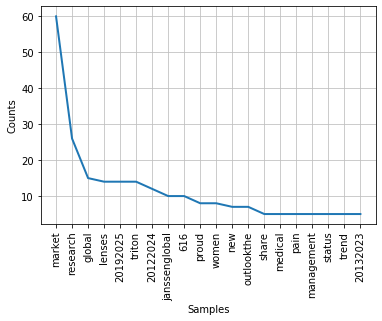

In [102]:
#Plot frequency distribution of tweets from JNJ
JNJ_fdist.plot(20,cumulative=False)
plt.show()

### Stock 2: MRK

In [66]:
#Tokenization 
MRK_text = MRK[1].str.cat(sep=', ')
tokenized_MRK_word = word_tokenize(MRK_text)

In [67]:
tokenized_MRK_word

['.',
 '@',
 'mike_nally',
 'to',
 'present',
 'at',
 'the',
 'Evercore',
 'ISI',
 'HealthCONx',
 'Conference',
 'on',
 '12/4',
 'at',
 '2PM',
 'EST',
 '.',
 'Learn',
 'more',
 ':',
 '$',
 'MRK',
 ',',
 'Learn',
 'more',
 'about',
 'our',
 'latest',
 '#',
 'BladderCancer',
 'update',
 ':',
 '$',
 'MRK',
 ',',
 'Decades',
 'after',
 'the',
 'start',
 'of',
 'the',
 'epidemic',
 ',',
 'HIV',
 'advocate',
 'Murray',
 'Penner',
 'recognizes',
 'that',
 'more',
 'still',
 'needs',
 'to',
 'be',
 'done',
 'to…',
 ',',
 'We',
 "'re",
 'committed',
 'to',
 'working',
 'with',
 'public',
 'and',
 'private',
 'organizations',
 'to',
 'help',
 'address',
 'the',
 'full',
 'range',
 'of',
 'factors',
 'affectin…',
 ',',
 'For',
 'more',
 'than',
 '30',
 'years',
 ',',
 'we',
 'have',
 'been',
 'committed',
 'to',
 'addressing',
 'the',
 'global',
 'challenges',
 'of',
 'the',
 'HIV',
 'epidemic',
 'but',
 'our',
 'work…',
 ',',
 'We',
 'have',
 'the',
 'secret',
 'ingredient',
 'to',
 'formulating

In [68]:
#Lower case text
tokenized_MRK_word = map(str.lower,tokenized_MRK_word)

In [69]:
#Set stop words
stop_words_MRK = set(stopwords.words('english'))
print(stop_words_MRK)  

{'s', 'into', 've', 'itself', 'have', 'just', 'does', 'ma', 'by', 'their', 'once', "that'll", "don't", 'being', 'can', 'too', "you'd", 'until', 'for', 'if', 'in', 'o', 'then', 'from', "wouldn't", 'after', "won't", 'those', 'don', 'has', 'did', 'his', 'i', 'couldn', "shan't", 'myself', 'most', 'do', 'didn', 'over', 'ourselves', 'which', 'themselves', "haven't", 'there', 'am', 'but', 'theirs', 'been', 'weren', 'through', 'y', 'having', 'under', 'shan', 'why', 'me', 'before', 'out', "hasn't", 'her', 'own', "weren't", 'any', "hadn't", 'an', 'a', "needn't", 'further', 'who', 'with', 'few', 'd', 'doesn', 'my', 'than', 're', "you're", 'she', 'mustn', 'nor', 'doing', 'so', 'shouldn', 'each', 'off', "isn't", "you'll", 'wasn', 'here', 'is', 'against', 'him', 'that', 'where', 'needn', 'down', 'he', 'and', 'above', 'haven', "didn't", "it's", 'himself', 'during', 'm', 'will', "you've", 'whom', 'same', 'only', 'herself', 'below', 'ain', 'wouldn', 'should', 'now', 'between', 'aren', 'you', 'some', "s

In [70]:
#Add stop words
newStopWords_MRK = [',', ';',':', "’", '?', '!', 'us', 'people', '.', '$', '&', '#','â', '€','¦', 'mrk', '@', 'rt', '&amp', 'amp', 'tm', 'usd', '#mrk', '@mrk', 
                'group', 'merck', 'mrk',"'s", 'learn', 'help', 'idf2019', 'updated','contact', 'latest', 'new', 'know','working',
                 '(', ')', 'committed','visit', '2020', 'addressing', 'patients', 'living', 'today', 'see', 'mission','world', 'great', 'meet']
stop_words_MRK.update(newStopWords_MRK)

In [71]:
# Remove stopwords from tokenized_MRK_word
filtered_MRK_word = []
for w in tokenized_MRK_word:
    if w not in stop_words_MRK:
        filtered_MRK_word.append(w)

In [72]:
#Frequency Distribution
MRK_fdist = FreqDist(filtered_MRK_word)

In [104]:
#Most common words in MRK tweets
MRK_fdist.most_common(7)

[('diabetes', 7),
 ('multiplesclerosis', 7),
 ('hiv', 5),
 ('lungcancer', 4),
 ('dyk', 4),
 ('healthcare', 4),
 ('health', 4)]

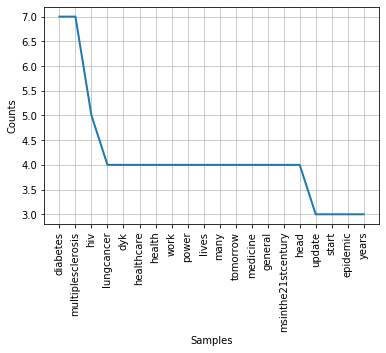

In [105]:
#Plot frequency distribution of tweets from JNJ
MRK_fdist.plot(20,cumulative=False)
plt.show()

### Stock 3: MDT

In [65]:
#Tokenization 
MDT_text = MDT[1].str.cat(sep=', ')
tokenized_MDT_word = word_tokenize(MDT_text)

In [66]:
tokenized_MDT_word

['The',
 'Cardiac',
 'Compass™',
 'Trends',
 'report',
 'provides',
 '14',
 'months',
 'of',
 'diagnostic',
 'data',
 'and',
 'trends',
 '.',
 'Visit',
 ',',
 'Have',
 '#',
 'MDT',
 'CareLink',
 'patient',
 'monitors',
 'that',
 'need',
 'to',
 'be',
 'returned',
 '?',
 'Utilize',
 'the',
 'new',
 'Self-service',
 'Portal',
 'to',
 'request',
 'and',
 're…',
 ',',
 'Explore',
 'our',
 'cardiac',
 'rhythm',
 'and',
 'heart',
 'failure',
 'CORE',
 'CURRICULUM',
 'on',
 '#',
 'MedtronicAcademy',
 '#',
 'MedEd',
 ',',
 'Need',
 'training',
 'on',
 'the',
 'Reveal',
 'LINQ™',
 'insertion',
 'procedure',
 '?',
 'Visit',
 'our',
 'learning',
 'plan',
 'on',
 '#',
 'MedtronicAcademy',
 'and',
 'earn',
 'a',
 'comp…',
 ',',
 'Thanks',
 'to',
 'all',
 'who',
 'visited',
 'us',
 'at',
 '#',
 'AHA19',
 'in',
 'Philadelphia',
 '!',
 ',',
 'Data',
 'on',
 'the',
 'Impact',
 'of',
 'CIED',
 'Infections',
 'from',
 'the',
 'TYRX',
 '#',
 'WRAPITstudy',
 'are',
 'now',
 'available',
 '.',
 'Visit',
 'o

In [67]:
#Lower case text
tokenized_MDT_word = map(str.lower,tokenized_MDT_word)

In [68]:
#Set stop words
stop_words_MDT = set(stopwords.words('english'))
print(stop_words_MDT)  

{'of', 'than', 't', 'weren', 'm', "couldn't", 'because', "wasn't", "weren't", 'needn', 'all', 'below', 'don', 'theirs', "it's", 'the', 'isn', 'he', 'doing', "you'll", 'shouldn', 'their', 'why', 'this', 'only', 'itself', 'have', 'she', 'on', 'ma', 'during', 'no', 'about', 'both', 'each', 'but', 'where', 'does', 'mustn', 'him', 'just', "that'll", 'once', 'in', 'been', 'then', "shan't", 'or', 'into', 'under', 'be', 'until', 'what', 'very', 'at', 'to', "wouldn't", 'over', 'hadn', "isn't", 'her', 'you', 'its', 'themselves', 'above', 'such', 'mightn', 'didn', "haven't", 'i', 'couldn', 'off', "don't", 'those', 'while', "you're", 'wouldn', 'nor', "doesn't", "she's", 'that', 'yours', 'my', 'yourselves', 'for', "won't", 'had', "hadn't", 'were', 'between', 'should', 'our', 'being', 'hers', 'an', 'from', 'more', 'most', 'other', 'won', 'is', 'up', 'after', 'do', 'can', 'wasn', 're', 'they', 'y', 'myself', 'now', "mightn't", "didn't", 'further', 'by', 'so', 'them', 'against', 'aren', "needn't", 'yo

In [69]:
#Add stop words
newStopWords_MDT = [',', ';',':', "’", '?', '!', 'us', 'people', '.', '$', '&', '#','â', '€','¦', '@', 'rt', '&amp', 
                    'amp', 'tm', 'usd', '#mdt', '@mdt', 'group', 'medtronic', 'mdt',"'s", 'learn', 'help', 'updated','contact', 
                    'latest', 'new', 'know','working', '@medtronicceo', "'re", 'booth', '(', ')','…', 'committed','visit', 
                    'addressing', 'patients','living', 'impact', 'today', 'see', 'patient', '3026','mission','world', 
                    'great', 'meet','report','need', 'data','hi', 'company', 'please', 'read', 'hours','50,000','%', '-'
                   'take', 'call',"we're"]
stop_words_MDT.update(newStopWords_MDT)

In [59]:
# Remove stopwords from tokenized_MDT_word
filtered_MDT_word = []
for w in tokenized_MDT_word:
    if w not in stop_words_MDT:
        filtered_MDT_word.append(w)

In [60]:
#Frequency Distribution
MDT_fdist = FreqDist(filtered_MDT_word)

In [61]:
#Most common words in MDT tweets
MDT_fdist.most_common(5)

[('aha19', 8),
 ('medtronicacademy', 5),
 ('heart', 4),
 ('failure', 4),
 ('vadtherapy', 4)]

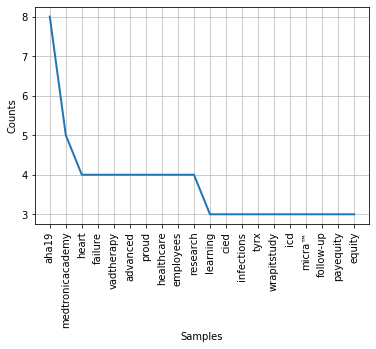

In [132]:
#Plot frequency distribution of tweets from JNJ
MDT_fdist.plot(20,cumulative=False)
plt.show()

In [ ]:
# AHA19:American Heart Association’s 2019 Annual Scientific Sessions

## Word cloud

* Reference: https://sebastianraschka.com/Articles/2014_twitter_wordcloud.html

### Stock 1: JNJ

In [133]:
# remove RTs, and twitter handles
JNJ_word = " ".join([word for word in JNJ_text.split()
                                if not word.startswith('@')
                                and word != 'RT'
                            ])

In [134]:
# Setting wordcloud
JNJ_wordcloud = WordCloud(
                      font_path = 'C:/Users/cxie/Desktop/Financial programming/Individual-Twitter API/BAUHS93.ttf',
                      stopwords = stop_words_JNJ,
                      background_color = 'white',
                      width = 1800,
                      height = 1400
                     ).generate(JNJ_word)

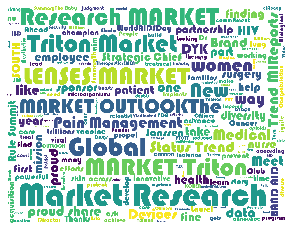

In [135]:
#Plot JNJ_wordcloud
plt.imshow(JNJ_wordcloud)
plt.axis('off')
plt.savefig('C:/Users/cxie/Desktop/Financial programming/Individual-Twitter API/JNJ_wordcloud_4.png', dpi=300)
plt.show()

In [70]:
#Try to plot twitter logo shape wordcloud
# failed to import imread
#twitter_mask = imread('C:/Users/cxie/Desktop/Financial programming/Individual-Twitter API/twitter_mask.png')
#JNJ_TW_wordcloud = WordCloud(
#                      font_path='/Users/sebastian/Library/Fonts/CabinSketch-Bold.ttf',
#                     stopwords=STOPWORDS,
#                     background_color='white',
#                     width=1800,
#                     height=1400,
#                     mask=twitter_mask
#           ).generate(JNJ_word)

#plt.imshow(JNJ_TW_wordcloud)
#plt.axis('off')
#plt.savefig('C:/Users/cxie/Desktop/Financial programming/Individual-Twitter API/JNJ_TW_wordcloud_1.png', dpi=300)
#plt.show()

### Stock 2: MRK

In [148]:
# remove RTs, and twitter handles
MRK_word = " ".join([word for word in MRK_text.split()
                                if not word.startswith('@')
                                and word != 'RT'
                            ])

In [149]:
# Setting wordcloud
MRK_wordcloud = WordCloud(
                      font_path = 'C:/Users/cxie/Desktop/Financial programming/Individual-Twitter API/COOPBL.ttf',
                      stopwords = stop_words_MRK,
                      background_color = 'white',
                      width = 1800,
                      height = 1400
                     ).generate(MRK_word)

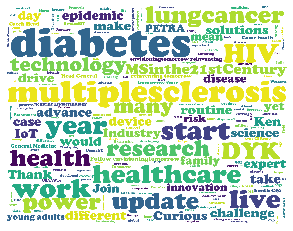

In [150]:
#Plot MRK_wordcloud
plt.imshow(MRK_wordcloud)
plt.axis('off')
plt.savefig('C:/Users/cxie/Desktop/Financial programming/Individual-Twitter API/MRK_wordcloud_7.png', dpi=300)
plt.show()

### Stock 3: MDT

In [70]:
# remove RTs, and twitter handles
MDT_word = " ".join([word for word in MDT_text.split()
                                if not word.startswith('@')
                                and word != 'RT'
                            ])

In [71]:
# Setting wordcloud
MDT_wordcloud = WordCloud(
                      font_path = 'C:/Users/cxie/Desktop/Financial programming/Individual-Twitter API/RAVIE.ttf',
                      stopwords = stop_words_MDT,
                      background_color = 'white',
                      width = 1800,
                      height = 1400
                     ).generate(MDT_word)

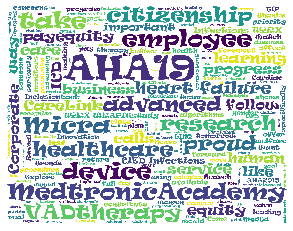

In [72]:
#Plot MDT wordcloud
plt.imshow(MDT_wordcloud)
plt.axis('off')
plt.savefig('C:/Users/cxie/Desktop/Financial programming/Individual-Twitter API/MDT_wordcloud_6.png', dpi=300)
plt.show()

In [154]:
# AHA19:American Heart Association’s 2019 Annual Scientific Sessions

## Sentiment Analysis

* Reference:
    https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk  
    http://www.nltk.org/howto/sentiment.html

### Stock 1: JNJ

In [166]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cxie\AppData\Roaming\nltk_data...


True

In [159]:
JNJ[1]

1      On #WorldAIDSDay, #JNJ is proud to share the p...
2      "I did what many wouldn't—I removed my gloves ...
3      "The way to deal with the shame and trauma, in...
4      Meet Dr. @SchuitemakerH, the trailblazing HIV ...
5      #DYK before BAND-AID® Brand adhesive bandages,...
                             ...                        
337    TAIWAN CONTACT LENSES MARKET 20192025 Publishe...
338    CANADA CONTACT LENSES MARKET 20192025 Publishe...
339    Global Enzyme Replacement Therapy Market Resea...
340    SOUTH KOREA CONTACT LENSES MARKET 20192025 Pub...
358    SPAIN CONTACT LENSES MARKET 20192025 Published...
Name: 1, Length: 95, dtype: object

In [181]:
#Detect sentiment using Vader
sid = SentimentIntensityAnalyzer()
for sentence in JNJ[1]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

On #WorldAIDSDay, #JNJ is proud to share the powerful story of employee Fernando Salinas, who shortly after adoptin… 
compound: 0.7964, 
neg: 0.0, 
neu: 0.649, 
pos: 0.351, 
"I did what many wouldn't—I removed my gloves and touched the patients.” — @5BFilm’s Alison Paolercio, a nurse who… 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
"The way to deal with the shame and trauma, in part, is to talk about it and find ways to heal."—@Lavernecox, the f… 
compound: -0.7096, 
neg: 0.219, 
neu: 0.781, 
pos: 0.0, 
Meet Dr. @SchuitemakerH, the trailblazing HIV researcher who leads viral vaccine programs at @JanssenGlobal. Ahead… 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
#DYK before BAND-AID® Brand adhesive bandages, home cooks treated cuts &amp; nicks with strips of gauze they had to tie… 
compound: -0.296, 
neg: 0.104, 
neu: 0.896, 
pos: 0.0, 
Ahead of #WorldAIDSDay, #JNJ is proud to share the story of @5BFilm's Cliff Morrison &amp; champion nurses on the front… 
compound: 0.8481, 


In [184]:
#summarize the score
JNJ_summary = {"positive":0,"neutral":0,"negative":0}
for x in JNJ[1]: 
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        JNJ_summary["neutral"] +=1
    elif ss["compound"] > 0.0:
        JNJ_summary["positive"] +=1
    else:
        JNJ_summary["negative"] +=1
print(JNJ_summary)

{'positive': 42, 'neutral': 40, 'negative': 13}


### Stock 2: MRK

In [ ]:
MRK[1]

In [73]:
#Detect sentiment using Vader
sid = SentimentIntensityAnalyzer()
for sentence in MRK[1]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

.@mike_nally to present at the Evercore ISI HealthCONx Conference on 12/4 at 2PM EST. Learn more:  $MRK
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Learn more about our latest #BladderCancer update:  $MRK 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Decades after the start of the epidemic, HIV advocate Murray Penner recognizes that more still needs to be done to… 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
We're committed to working with public and private organizations to help address the full range of factors affectin… 
compound: 0.5859, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
For more than 30 years, we have been committed to addressing the global challenges of the HIV epidemic but our work… 
compound: 0.1779, 
neg: 0.0, 
neu: 0.876, 
pos: 0.124, 
We have the secret ingredient to formulating a great #Thanksgiving: a dash of gratitude for all our patients, emplo… 
compound: 0.8126, 
neg: 0.0, 
neu: 0.67, 
pos: 0.33, 
Meet Josh Robbins, an outspoken #HIV advocate who know

In [74]:
#summarize the score
MRK_summary = {"positive":0,"neutral":0,"negative":0}
for x in MRK[1]: 
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        MRK_summary["neutral"] +=1
    elif ss["compound"] > 0.0:
        MRK_summary["positive"] +=1
    else:
        MRK_summary["negative"] +=1
print(MRK_summary)

{'positive': 58, 'neutral': 38, 'negative': 12}


### Stock 3: MDT

In [169]:
MDT[1]

1      The Cardiac Compass™ Trends report provides 14...
2      Have #MDT CareLink patient monitors that need ...
3      Explore our cardiac rhythm and heart failure C...
4      Need training on the Reveal LINQ™ insertion pr...
5      Thanks to all who visited us at #AHA19 in Phil...
                             ...                        
317    RT @GeoffMartha: Looking forward to tomorrow -...
318    More than 40% of U.S. doctors report burnout. ...
337    RT @MedtronicCEO: Yesterday - the most importa...
338    RT @GeoffMartha: The annual @Medtronic Holiday...
358    We've pushed the boundaries of implantable dev...
Name: 1, Length: 66, dtype: object

In [75]:
#Detect sentiment using Vader
sid = SentimentIntensityAnalyzer()
for sentence in MDT[1]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

The Cardiac Compass™ Trends report provides 14 months of diagnostic data and trends. Visit  
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Have #MDT CareLink patient monitors that need to be returned? Utilize the new Self-service Portal to request and re… 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Explore our cardiac rhythm and heart failure CORE CURRICULUM on #MedtronicAcademy #MedEd  
compound: -0.5106, 
neg: 0.231, 
neu: 0.769, 
pos: 0.0, 
Need training on the Reveal LINQ™ insertion procedure? Visit our learning plan on #MedtronicAcademy and earn a comp… 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Thanks to all who visited us at #AHA19 in Philadelphia! 
compound: 0.4926, 
neg: 0.0, 
neu: 0.738, 
pos: 0.262, 
Data on the Impact of CIED Infections from the TYRX #WRAPITstudy are now available. Visit our booth at #AHA19 to se… 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
See @BruceWilkoff at #AHA19 as he presents the Impact of CIED Infections from the TYRX #WRAPITst

In [77]:
#summarize the score
MDT_summary = {"positive":0,"neutral":0,"negative":0}
for x in MDT[1]: 
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        MDT_summary["neutral"] +=1
    elif ss["compound"] > 0.0:
        MDT_summary["positive"] +=1
    else:
        MDT_summary["negative"] +=1
print(MDT_summary)

{'positive': 40, 'neutral': 20, 'negative': 6}
